In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
wine=pd.read_csv("A:/Data Science/assignments/PCA/wine.csv")

In [8]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [9]:
wine.shape

(178, 14)

In [10]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [12]:
z=wine.iloc[:,1:]
z.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
scale=StandardScaler()
wine_scale=scale.fit_transform(z)
wine_scale=pd.DataFrame(wine_scale,columns=z.columns)

In [14]:
wine_scale

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [23]:
wine_pca=PCA(n_components=4)
wine_values=wine_pca.fit_transform(wine_scale)


In [24]:
wine_values.shape

(178, 4)

In [25]:

wine_pca.n_components_

4

In [26]:
# The amount of variance that each PCA explains is 
var=wine_pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [27]:
#Cumlative frequency
var_cum=np.cumsum(np.round(var,decimals=2))*100
var_cum

array([36., 55., 66., 73.])

In [28]:
wine_pca.components_[:,0]

array([ 0.1443294 , -0.48365155, -0.20738262, -0.0178563 ])

In [29]:
wine_values[:,0]

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

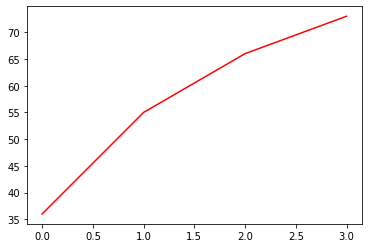

In [30]:
plt.plot(var_cum,color='red')

In [34]:
principalDf = pd.DataFrame(data = wine_values
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

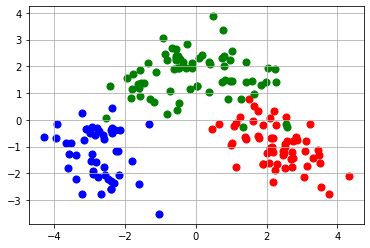

In [37]:
Type=[1,2,3]
colors=['red','green','blue']
for Type,colors in zip(Type,colors):
    indicesToKeep = finalDf['Type'] == Type
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = colors
               , s = 50)
  
plt.grid()

In [38]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster.hierarchical import AgglomerativeClustering

In [39]:
dist=linkage(wine_values,method='complete',metric='euclidean')

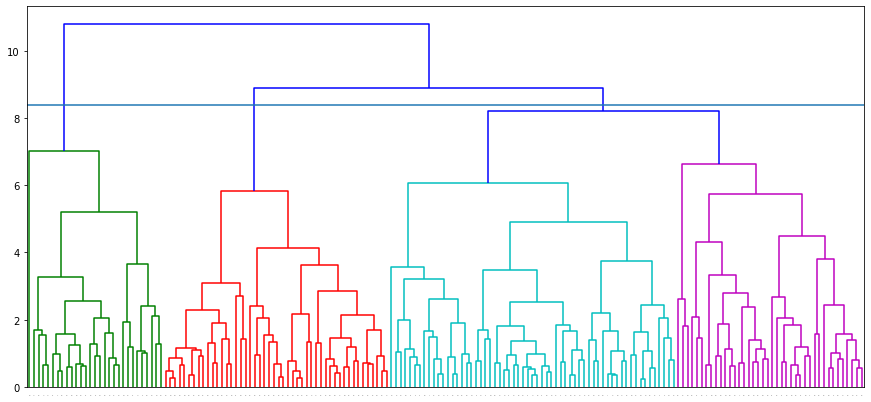

In [40]:
plt.figure(figsize=(15,7))
sch=dendrogram(dist,leaf_font_size=1,leaf_rotation=1)
plt.axhline(y=8.4)

In [41]:
#taking 3 clusters
clusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete').fit(wine_values)


In [42]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [43]:
Cluster_1=pd.Series(clusters.labels_)

In [44]:
wine['Cluster']=Cluster_1

In [45]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [46]:
wine.Cluster.value_counts()

0    101
2     48
1     29
Name: Cluster, dtype: int64

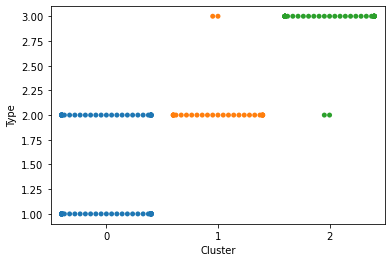

In [47]:
sns.swarmplot(wine.Cluster,wine.Type)

In [48]:
#Kmeans
from sklearn.cluster import KMeans

In [ ]:
r=range(2,10)
SSE=[]
for i in r:
    km=KMeans(n_clusters=i)
    km.fit(wine_values)
    SSE.append(km.inertia_)

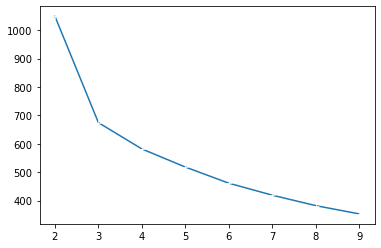

In [50]:
sns.lineplot(r,SSE,marker='+')

In [51]:
km1=KMeans(n_clusters=3)
clusters=km1.fit(wine_values)
Clusters_kmeans=pd.Series(clusters.labels_)

In [52]:
wine['Clusters_kmeans']=Clusters_kmeans

In [53]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster,Clusters_kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2


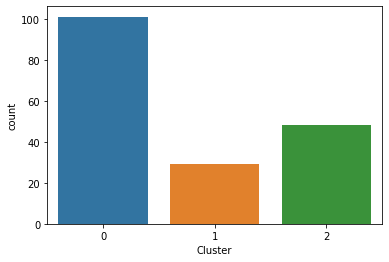

In [54]:
sns.countplot(wine.Cluster)

In [55]:
wine.Cluster.value_counts()

0    101
2     48
1     29
Name: Cluster, dtype: int64

In [56]:
wine.Clusters_kmeans.value_counts()

2    65
0    62
1    51
Name: Clusters_kmeans, dtype: int64

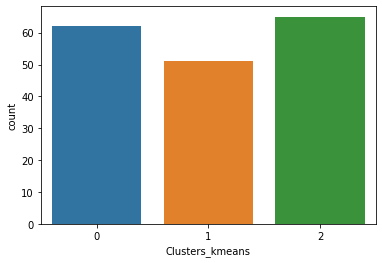

In [57]:
sns.countplot(wine.Clusters_kmeans)

In [159]:
wine=pd.read_csv("A:/Data Science/assignments/PCA/wine.csv")

In [71]:
z=wine.iloc[:,1:]

In [73]:
scaled=StandardScaler()
scaled_data=scaled.fit_transform(z)
scaled_data=pd.DataFrame(scaled_data,columns=[ 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])

In [74]:
scaled_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [84]:
#Using Kmeans on the orginal dataset
r=range(2,10)
SSE1=[]
for i in r:
    km_or=KMeans(n_clusters=i)
    km_or.fit(scaled_data)
    SSE1.append(km_or.inertia_)

In [85]:
SSE1

[1659.0079672511504,
 1277.928488844643,
 1175.3789993448745,
 1112.7785445613165,
 1049.4423075035206,
 994.2615969460754,
 947.1627875972305,
 890.9362917867114]

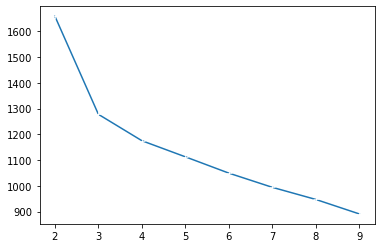

In [86]:
sns.lineplot(r,SSE1,marker='+')

In [88]:
KM=KMeans(n_clusters=3)
KM.fit(scaled_data)

KMeans(n_clusters=3)

In [143]:
clusters=pd.Series(KM.labels_,)

In [144]:
clusters.=['clusters']

In [165]:
wine=pd.concat([wine,clusters],axis = 1)

In [173]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,0
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [176]:
wine.rename(index={14:'clusters'},inplace=True)

In [177]:
wine.columns

Index([           'Type',         'Alcohol',           'Malic',
                   'Ash',      'Alcalinity',       'Magnesium',
               'Phenols',      'Flavanoids',   'Nonflavanoids',
       'Proanthocyanins',           'Color',             'Hue',
              'Dilution',         'Proline',                 0],
      dtype='object')

In [178]:

wine.shape

(178, 15)

In [185]:
group=wine.groupby(['Type'])

In [187]:
group.mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,0
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0
